In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('tmp_timeseries_dataset.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'iso_code', 'biofuel_elec_per_capita',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity',
       'gas_production', 'greenhouse_gas_emissions', 'hydro_consumption',
       'hydro_elec_per_capita', 'hydro_electricity', 'low_carbon_electricity',
       'net_elec_imports', 'nuclear_electricity', 'oil_production',
       'per_capita_electricity', 'primary_energy_consumption',
       'solar_elec_per_capita', 'solar_electricity', 'wind_elec_per_capita',
       'wind_electricity', 'GDP_per_capita'],
      dtype='object')

In [120]:
df = pd.read_csv('tmp_timeseries_dataset.csv')
df = df[['country',
         'year',
         'per_capita_electricity', 
         'biofuel_elec_per_capita',
         'solar_elec_per_capita',  
         'hydro_elec_per_capita',
         'wind_elec_per_capita', 
         'GDP_per_capita']]

country_index = 23
df = df.iloc[23*country_index:23*country_index+22,:]
df

,country,year,per_capita_electricity,biofuel_elec_per_capita,solar_elec_per_capita,hydro_elec_per_capita,wind_elec_per_capita,GDP_per_capita
529,Brazil,2000,1947.875,42.133,0.000,1713.502,0.000,6745.865881
530,Brazil,2001,1813.403,47.528,0.000,1488.116,0.224,6749.889719
531,Brazil,2002,1885.507,53.525,0.000,1569.344,0.332,6868.704165
532,Brazil,2003,1965.183,61.655,0.000,1656.689,0.329,6865.181505
533,Brazil,2004,2063.479,63.771,0.000,1719.286,0.325,7178.356116
534,Brazil,2005,2118.446,68.470,0.000,1788.462,0.482,7325.912358
535,Brazil,2006,2181.594,74.091,0.000,1828.825,1.271,7534.551559
536,Brazil,2007,2291.494,88.951,0.000,1940.827,3.355,7909.834758
537,Brazil,2008,2359.914,98.146,0.000,1898.872,4.360,8231.110269
538,Brazil,2009,2357.988,112.124,0.000,1989.949,6.375,8142.770839


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 529 to 550
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  22 non-null     object 
 1   year                     22 non-null     int64  
 2   per_capita_electricity   22 non-null     float64
 3   biofuel_elec_per_capita  22 non-null     float64
 4   solar_elec_per_capita    22 non-null     float64
 5   hydro_elec_per_capita    22 non-null     float64
 6   wind_elec_per_capita     22 non-null     float64
 7   GDP_per_capita           22 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ KB


In [122]:
df['total_elec_per_capita'] = df['per_capita_electricity'] + df['biofuel_elec_per_capita'] + \
                              df['solar_elec_per_capita'] + df['hydro_elec_per_capita'] + \
                              df['wind_elec_per_capita']

In [137]:
df_1 = df[['year', 'total_elec_per_capita']].set_index('year')
df_1

,total_elec_per_capita
year,
2000,3703.510
2001,3349.271
2002,3508.708
2003,3683.856
2004,3846.861
2005,3975.860
2006,4085.781
2007,4324.627
2008,4361.292


In [138]:
df1 = df_1.copy()
df1['t-1'] = df_1.shift(1)
df1['t-2'] = df_1.shift(2)
df1['t-3'] = df_1.shift(3)

In [139]:
df1.head(3)

,total_elec_per_capita,t-1,t-2,t-3
year,,,,
2000,3703.510,NaN,NaN,NaN
2001,3349.271,3703.510,NaN,NaN
2002,3508.708,3349.271,3703.51,NaN


In [140]:
df1.shape

(22, 4)

## Train Test Split

Here we have to use **contigous** dataset split (train -> test) instead of the traditional **Holdout Method**.

In [154]:
train_size = 0.6
index = int(df1.shape[0]*train_size)

train = df_1[:index]
test = df_1[index:]

In [155]:
train.head()

,total_elec_per_capita
year,
2000,3703.510
2001,3349.271
2002,3508.708
2003,3683.856
2004,3846.861


In [156]:
y_pred = test.shift(1)
y_pred.head(3)

,total_elec_per_capita
year,
2013,NaN
2014,4958.959
2015,4977.301


In [157]:
y_pred = test.shift(1).dropna()
y_true = test[1:]
print(f"R2:{r2_score(y_true, y_pred)}")

R2:0.6727190799509535


In [14]:
test

,biofuel_elec_per_capita
year,
2015,231.690
2016,237.552
2017,242.680
2018,248.041
2019,248.793
2020,265.295
2021,268.749


In [159]:
df2 = df_1.copy(); 
df2_train = train.copy();
df2_test = test.copy()

for i in range(1, 3):
    df2_train[f't - {i}'] = train['total_elec_per_capita'].shift(i)
    df2_test[f't - {i}'] = test['total_elec_per_capita'].shift(i)


In [160]:
df2_test

,total_elec_per_capita,t - 1,t - 2
year,,,
2013,4958.959,NaN,NaN
2014,4977.301,4958.959,NaN
2015,4875.427,4977.301,4958.959
2016,5002.282,4875.427,4977.301
2017,5014.557,5002.282,4875.427
2018,5171.135,5014.557,5002.282
2019,5341.556,5171.135,5014.557
2020,5320.823,5341.556,5171.135
2021,5464.801,5320.823,5341.556


In [161]:
df2_train.tail()

,total_elec_per_capita,t - 1,t - 2
year,,,
2008,4361.292,4324.627,4085.781
2009,4466.436,4361.292,4324.627
2010,4821.763,4466.436,4361.292
2011,4993.863,4821.763,4466.436
2012,5010.258,4993.863,4821.763


In [162]:
df2_test

,total_elec_per_capita,t - 1,t - 2
year,,,
2013,4958.959,NaN,NaN
2014,4977.301,4958.959,NaN
2015,4875.427,4977.301,4958.959
2016,5002.282,4875.427,4977.301
2017,5014.557,5002.282,4875.427
2018,5171.135,5014.557,5002.282
2019,5341.556,5171.135,5014.557
2020,5320.823,5341.556,5171.135
2021,5464.801,5320.823,5341.556


In [163]:
df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.tail()

,total_elec_per_capita,t - 1,t - 2
year,,,
2008,4361.292,4324.627,4085.781
2009,4466.436,4361.292,4324.627
2010,4821.763,4466.436,4361.292
2011,4993.863,4821.763,4466.436
2012,5010.258,4993.863,4821.763


In [164]:
df2_test

,total_elec_per_capita,t - 1,t - 2
year,,,
2015,4875.427,4977.301,4958.959
2016,5002.282,4875.427,4977.301
2017,5014.557,5002.282,4875.427
2018,5171.135,5014.557,5002.282
2019,5341.556,5171.135,5014.557
2020,5320.823,5341.556,5171.135
2021,5464.801,5320.823,5341.556


In [165]:
# Train Test Split
X2_train = df2_train.drop(columns = ['total_elec_per_capita'])
y2_train = df2_train['total_elec_per_capita']
X2_test = df2_test.drop(columns = ['total_elec_per_capita'])
y2_test = df2_test['total_elec_per_capita']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(11, 2) (11,) (7, 2) (7,)


In [166]:
# Predict and measure R2
model = LinearRegression()
model = model.fit(X2_train, y2_train)


In [168]:
X2_train.head()

,t - 1,t - 2
year,,
2002,3349.271,3703.510
2003,3508.708,3349.271
2004,3683.856,3508.708
2005,3846.861,3683.856
2006,3975.860,3846.861


In [169]:
X2_test

,t - 1,t - 2
year,,
2015,4977.301,4958.959
2016,4875.427,4977.301
2017,5002.282,4875.427
2018,5014.557,5002.282
2019,5171.135,5014.557
2020,5341.556,5171.135
2021,5320.823,5341.556


R2:  0.6794715338773738


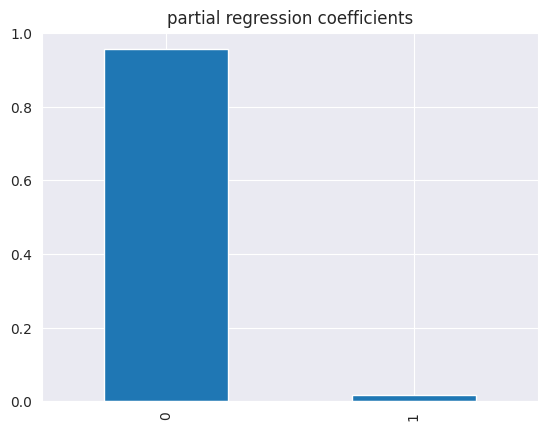

In [170]:

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [172]:
df_1.index = pd.to_datetime(df_1.index, format='%Y')

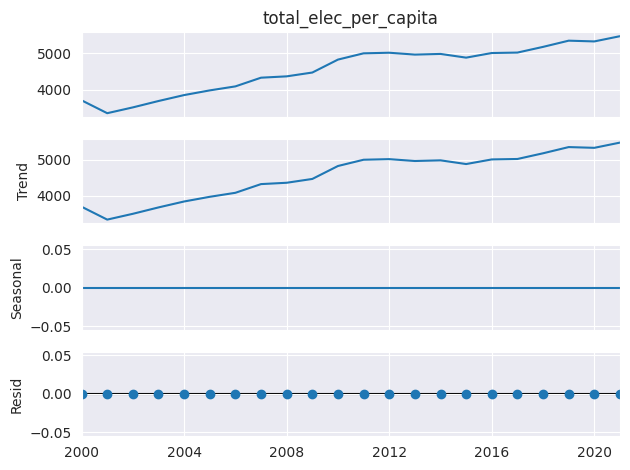

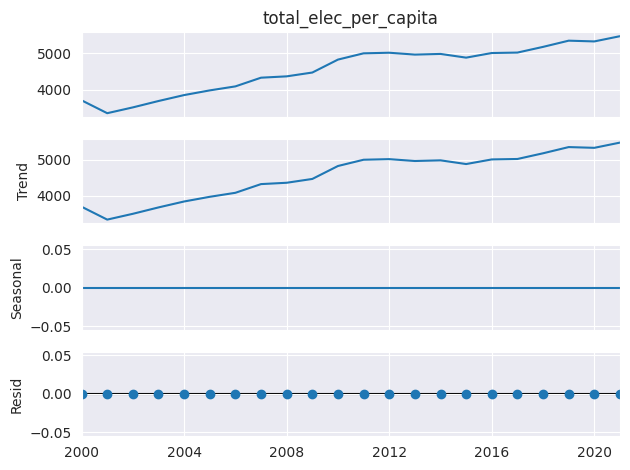

In [175]:
result_add = seasonal_decompose(df_1['total_elec_per_capita'], model='additive')
result_add.plot()

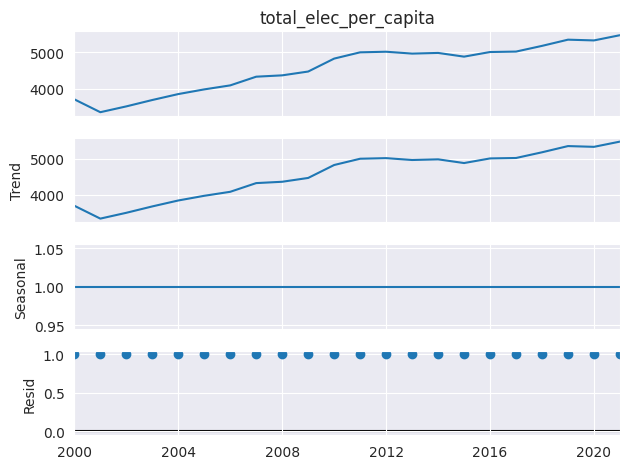

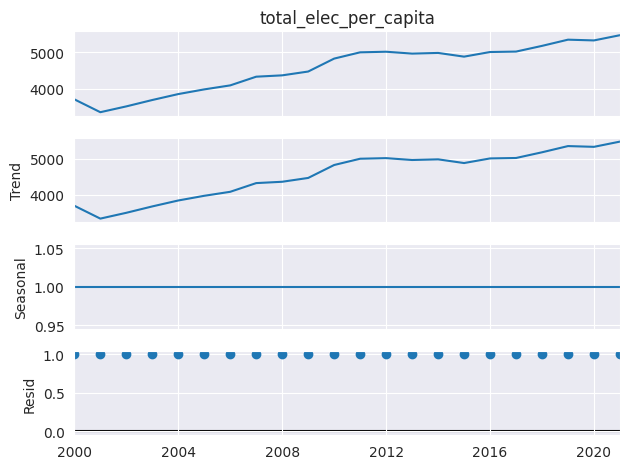

In [177]:
result_mul = seasonal_decompose(df_1['total_elec_per_capita'], model='multiplicative')
result_mul.plot()

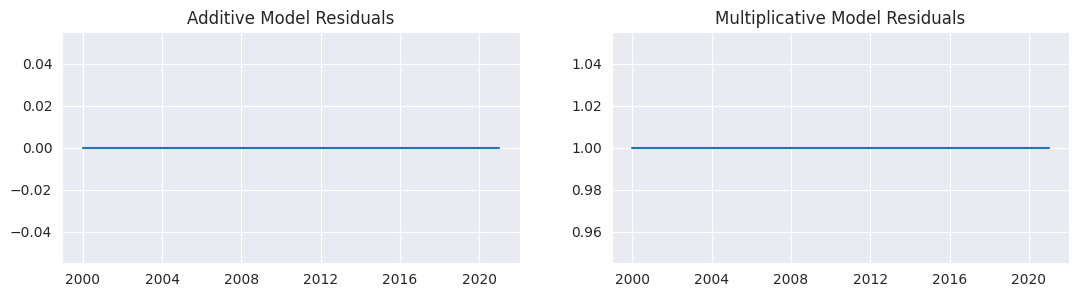

In [178]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive Model Residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative Model Residuals");

In [180]:
df_1.head(3)

,total_elec_per_capita
year,
2000-01-01,3703.510
2001-01-01,3349.271
2002-01-01,3508.708


/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



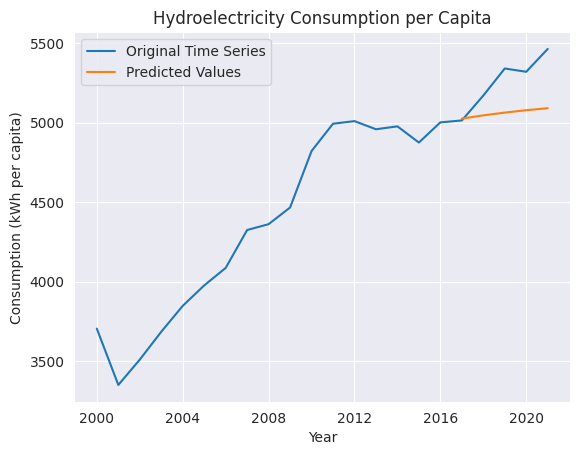

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# split the dataset into training and testing sets
train = df[:-5]
test = df[-5:]

# define the ARIMA model
model = ARIMA(train, order=(1, 1, 1))

# fit the model to the training data
results = model.fit()

# make predictions for the next 5 years
predictions = results.forecast(steps=5)

# plot the original time series and the predicted values
plt.plot(df.index, df['total_elec_per_capita'], label='Original Time Series')
plt.plot(test.index, predictions, label='Predicted Values')

# customize the plot
plt.title('Hydroelectricity Consumption per Capita')
plt.xlabel('Year')
plt.ylabel('Consumption (kWh per capita)')
plt.legend()

# show the plot
plt.show()

In [208]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# define the ARIMA model

#1,2,1 the best
for a in range(1,4):
    for b in range(1,4):
        for c in range(1,4):
            model = ARIMA(train_data, order=(a, b, c))
            
            # fit the model to the training data
            results = model.fit()
            
            # make predictions for the testing data
            start_date = test_data.index[0]
            end_date = test_data.index[-1]
            predictions = results.predict(start=start_date, end=end_date, typ='levels')
            
            # calculate the R-squared score, MAE, and MSE for the testing data
            r2 = r2_score(test_data, predictions)
            mae = mean_absolute_error(test_data, predictions)
            mse = mean_squared_error(test_data, predictions)
            
            # print the R-squared score, MAE, and MSE for the testing data
            #print(f"{a} {b} {c}")
            print(f"{a} {b} {c}")
            print(f"R-squared score: {r2:.3f}")
            print(f"MAE: {mae:.3f}")
            print(f"RMSE: {mse:.3f}")

1 1 1
R-squared score: -1.413
MAE: 205.791
RMSE: 58109.751
1 1 2
R-squared score: -1.888
MAE: 224.642
RMSE: 69543.100
1 1 3
R-squared score: -11.031
MAE: 469.624
RMSE: 289699.012
1 2 1
R-squared score: 0.881
MAE: 44.333
RMSE: 2854.891
1 2 2
R-squared score: 0.869
MAE: 45.990
RMSE: 3144.593
1 2 3
R-squared score: -2.210
MAE: 273.627
RMSE: 77289.064
1 3 1
R-squared score: 0.362
MAE: 99.408
RMSE: 15373.889
1 3 2
R-squared score: -1.963
MAE: 231.081
RMSE: 71361.274
1 3 3
R-squared score: -19.559
MAE: 605.788
RMSE: 495053.760
2 1 1
R-squared score: 0.517
MAE: 95.857
RMSE: 11628.922
2 1 2
R-squared score: -1.758
MAE: 218.391
RMSE: 66403.067
2 1 3
R-squared score: -7.674
MAE: 400.016
RMSE: 208876.979
2 2 1
R-squared score: 0.880
MAE: 45.983
RMSE: 2885.545
2 2 2
R-squared score: 0.862
MAE: 47.112
RMSE: 3311.078
2 2 3
R-squared score: 0.858
MAE: 51.508
RMSE: 3423.359
2 3 1
R-squared score: 0.862
MAE: 49.296
RMSE: 3327.915
2 3 2
R-squared score: 0.789
MAE: 60.039
RMSE: 5087.902
2 3 3
R-squared s

LinAlgError: LU decomposition error.

            total_elec_per_capita
year                             
2017-01-01               5014.557
2018-01-01               5171.135
2019-01-01               5341.556
2020-01-01               5320.823
2021-01-01               5464.801


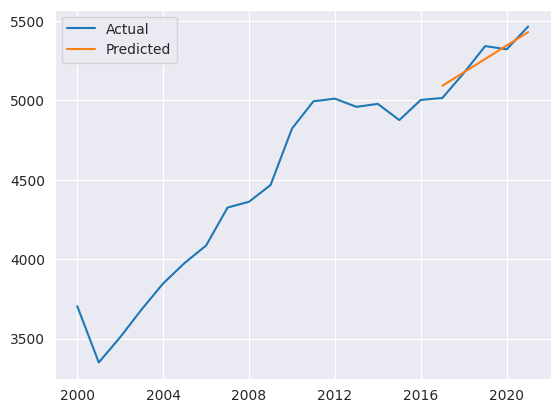

In [207]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

print(test_data)

# define the ARIMA model
model = ARIMA(train_data, order=(1, 2, 1))

# fit the model to the training data
results = model.fit()

# make predictions for the testing data
start_date = test_data.index[0]
end_date = test_data.index[-1]
predictions = results.predict(start=start_date, end=end_date, typ='levels')

# plot the actual values
plt.plot(df.index, df['total_elec_per_capita'], label='Actual')

# plot the predicted values
plt.plot(predictions.index, predictions, label='Predicted')

# add a legend and show the plot
plt.legend()
plt.show()

# ADD CI

TypeError: fill_between() missing 1 required positional argument: 'y1'

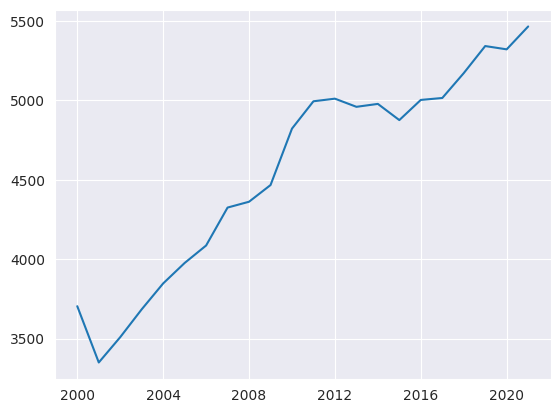

In [212]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# define the ARIMA model
model = ARIMA(train_data, order=(1, 2, 1))

# fit the model to the training data
results = model.fit()

# make predictions for the testing data
start_date = test_data.index[0]
end_date = test_data.index[-1]
predictions = results.predict(start=start_date, end=end_date, typ='levels')

# plot the actual values
plt.plot(df.index, df['total_elec_per_capita'], label='Actual')

# plot the training data background in blue
plt.fill_between(train_data.index, ymin=df['total_elec_per_capita'].min(), ymax=df['total_elec_per_capita'].max(), color='blue', alpha=0.1)

# plot the testing data background in orange
plt.fill_between(test_data.index, ymin=df['total_elec_per_capita'].min(), ymax=df['total_elec_per_capita'].max(), color='orange', alpha=0.1)

# plot the predicted values
plt.plot(predictions.index, predictions, label='Predicted')

# add a legend and show the plot
plt.legend()
plt.show()

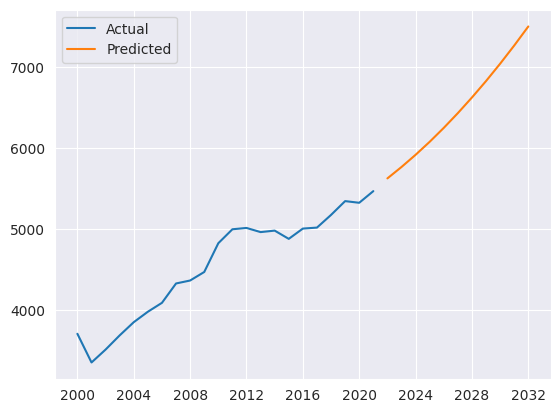

In [209]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# define the ARIMA model
model = ARIMA(train_data, order=(3, 3, 2))

# fit the model to the training data
results = model.fit()

# make predictions for the next 10 years
start_date = df.index[-1] + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(years=10)
predictions = results.predict(start=start_date, end=end_date, typ='levels')

# plot the actual values
plt.plot(df.index, df['total_elec_per_capita'], label='Actual')

# plot the predicted values
plt.plot(predictions.index, predictions, label='Predicted')

# add a legend and show the plot
plt.legend()
plt.show()

In [211]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# define the ARIMA model
model = ARIMA(df, order=(3, 3, 2))

# fit the model to the entire dataset
results = model.fit()

# make predictions for the next 10 years
start_date = df.index[-1] + pd.DateOffset(years=1)
end_date = df.index[-1] + pd.DateOffset(years=10)
idx = pd.date_range(start=start_date, end=end_date, freq='AS')
predictions = results.predict(start=start_date, end=end_date)

# create the plot using Plotly
fig = go.Figure()

# add the original time series as a line plot
fig.add_trace(go.Scatter(x=df.index, y=df['total_elec_per_capita'],
                    mode='lines',
                    name='Original Time Series'))

# add the predicted values as a line plot
fig.add_trace(go.Scatter(x=idx, y=predictions,
                    mode='lines',
                    name='Predicted Values'))

# customize the plot
fig.update_layout(title='Biofuel production per Capita',
                  xaxis_title='Year',
                  yaxis_title='Production (kWh per capita)')

# show the plot
fig.show()

In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# read the data into a DataFrame
df = df_1

# convert the index to a datetime index
df.index = pd.to_datetime(df.index)

# define the ARIMA model
model = ARIMA(df, order=(1, 1, 1))

# fit the model to the entire dataset
results = model.fit()

# make predictions for the next 5 years
start_date = df.index[-1] + pd.DateOffset(years=1)
end_date = df.index[-1] + pd.DateOffset(years=10)
idx = pd.date_range(start=start_date, end=end_date, freq='AS')
predictions = results.predict(start=start_date, end=end_date, typ='levels')

# create the plot using Plotly
fig = go.Figure()

# add the original time series
fig.add_trace(go.Scatter(x=df.index, y=df['biofuel_elec_per_capita'],
                         mode='lines', name='Original Time Series'))

# add the predicted values
fig.add_trace(go.Scatter(x=idx, y=predictions,
                         mode='lines', name='Predicted Values'))

# customize the plot
fig.update_layout(title='Biofuel production per Capita',
                  xaxis_title='Year',
                  yaxis_title='Production (kWh per capita)')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(showlegend=True)

# calculate the R-squared value manually
y_true = df['biofuel_elec_per_capita']
y_pred = results.fittedvalues
rss = np.sum((y_true - y_pred) ** 2)
tss = np.sum((y_true - np.mean(y_true)) ** 2)
rsquared = 1 - (rss / tss)

# calculate the adjusted R-squared value manually
n = len(y_true)
k = 2  # order=(1, 1, 1) has two parameters
rsquared_adj = 1 - (1 - rsquared) * (n - 1) / (n - k - 1)

# add the R-squared and adjusted R-squared values to the plot
if fig.layout.yaxis.range:
    fig.add_annotation(x=df.index[-15], y=fig['layout']['yaxis']['range'][1]*0.9,
                       text=f"R-squared: {rsquared:.3f}", showarrow=False,
                       font=dict(size=12, color='black', weight='bold'))
    fig.add_annotation(x=df.index[-15], y=fig['layout']['yaxis']['range'][1]*0.85,
                       text=f"Adjusted R-squared: {rsquared_adj:.3f}", showarrow=False,
                       font=dict(size=12, color='black', weight='bold'))

# show the plot
fig.show()

/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/home/fmaron/.pyenv/versions/3.10.6/envs/energy-economy/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

